In [1]:
import numpy as np

In [2]:
from utils_graph_generation import load_graph, get_paths
from utils_graph_metrics import get_exp
from utils_graph_plot import plot_degree_distribution, plot_degree_probability_distribution, plot_degree_cummulative_distribution, plot_degree_complementary_cummulative_distribution

# Distribución de grados
Dado un grafo muestra tres gráficas:
* Un histograma con la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con el acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo
* Un histograma con la inversa del acumulado de la frecuencia de los grados de los nodos normalizados según el número de nodos del grafo

In [17]:
# Dado un nombre de grafo, imprime las gráficas relativas a las distribuciones de grados de los nodos
def calc_plot_degree_distributions(name_graph, graphs_folder, plots_folder, G=None):
    if G is None:
        G = load_graph(name_graph, graphs_folder)

    # Normalizamos entre el número total de nodos
    points = np.sort(np.array(list(dict(G.degree()).values())).astype(float)/float(G.number_of_nodes()))

    get_exp([points], name_graph, show_comparative=False)

    plot_degree_distribution([points], name_graph, plots_folder)

    arr_deg_prob = plot_degree_probability_distribution([points], G.number_of_nodes(), name_graph, plots_folder)
    
    arr_deg_cum = plot_degree_cummulative_distribution(arr_deg_prob, name_graph, plots_folder)

    plot_degree_complementary_cummulative_distribution(arr_deg_cum, name_graph, plots_folder)


Cargado el grafo de la hora 437038, numero de nodos: 802, numero de aristas: 9511
Calculating best minimal value for power law fit
Resultados usando powerlaw (fit a powerlaw): 
alpha: 4.315919401908491
sigma: 0.7414621190577833
x_min: 0.18204488778054864
(Kolgomorov Smirnov) D: 0.07695906082321596

Resultados usando powerlaw (fit a truncated_powerlaw): 
alpha: 2.90043120653678
lambda: 4.226534112027533
x_min: 0.18204488778054864
(Kolgomorov Smirnov) D: 0.07492834054182296

Resultados usando plfit-main (ntamas):
measures/plfit_degrees/437038.txt:
	Continuous MLE
	alpha =      1.88125
	xmin  =      0.01122
	L     =    965.03696
	D     =      0.11117




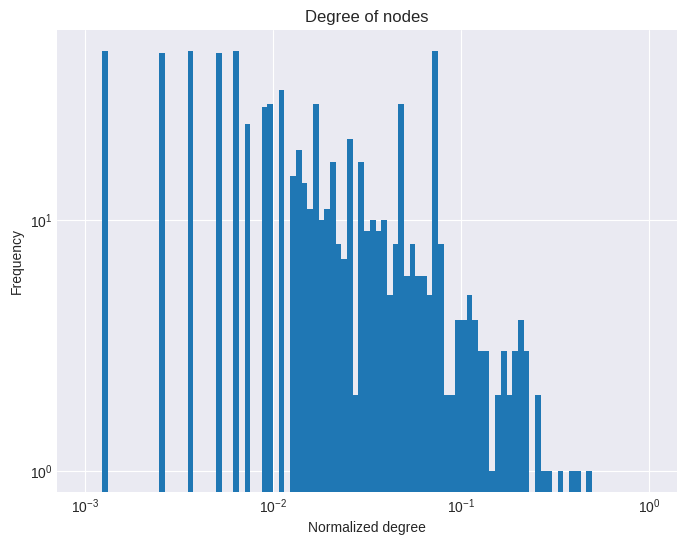

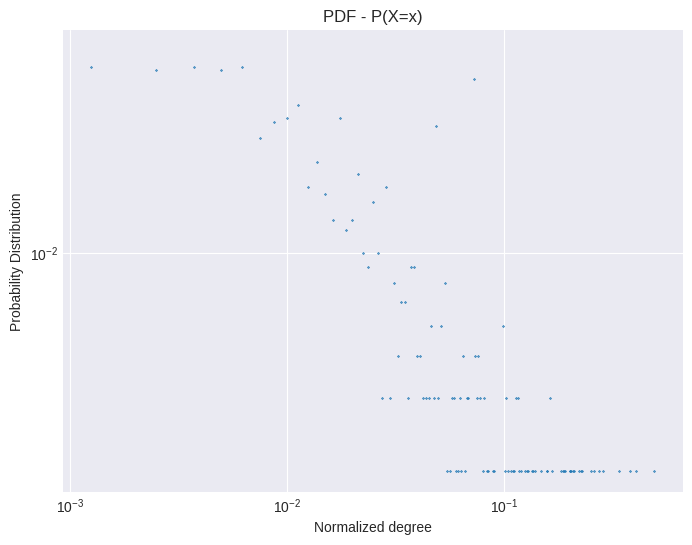

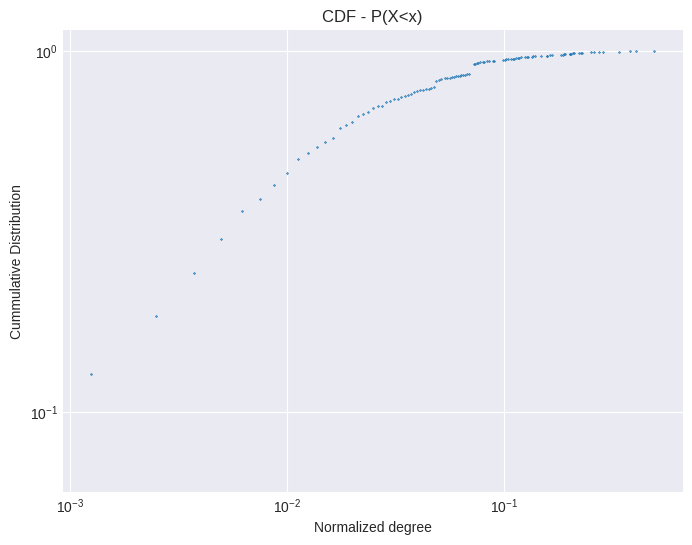

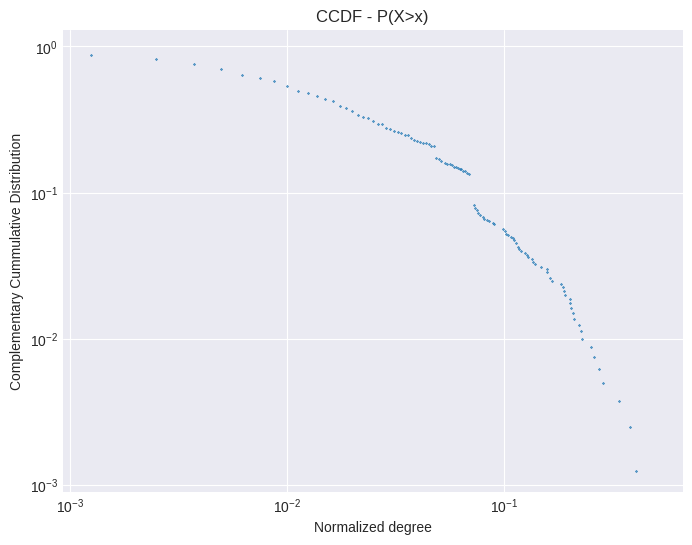

In [30]:
MODE = "hashtag"

MANIFESTACION = "nat"
hora = "429624"
#hora = "429625"

MANIFESTACION = "9n"
hora = "437038"
#hora = "437039"

graphs_folder, plots_folder = get_paths(MODE, MANIFESTACION, metric="degree")

calc_plot_degree_distributions(hora, graphs_folder, plots_folder)


In [22]:
from utils_graph_metrics import tresh_normalization

In [32]:
def calc_plot_degree_distributions_tres(name_graph, graphs_folder, plots_folder, G=None, arr_kt_plot=[5, 10, 20, 50, 100, 150, 200, 250]):
    
    # Cargamos el grafo inicial
    if G is None:
        G = load_graph(name_graph, graphs_folder)
    arr_points = []
    for kt in arr_kt_plot:
        F = tresh_normalization(G, kt)
        points_kt = np.sort(np.array(list(dict(F.degree()).values())).astype(float)/float(G.number_of_nodes()))
        arr_points.append(points_kt)

    get_exp(arr_points, name_graph, show_comparative=False, arr_kt=arr_kt_plot)
    
    plot_degree_distribution(arr_points, name_graph, plots_folder, arr_kt_plot=arr_kt_plot, alpha=0.45)

    arr_deg_prob = plot_degree_probability_distribution(arr_points, G.number_of_nodes(), name_graph, plots_folder, arr_kt_plot=arr_kt_plot)
    
    arr_deg_cum = plot_degree_cummulative_distribution(arr_deg_prob, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)

    plot_degree_complementary_cummulative_distribution(arr_deg_cum, name_graph, plots_folder, arr_kt_plot=arr_kt_plot)

Cargado el grafo de la hora 437038, numero de nodos: 802, numero de aristas: 9511
Calculating best minimal value for power law fit
Resultados usando powerlaw (fit a powerlaw): 
alpha: 4.315919401908491
sigma: 0.7414621190577833
x_min: 0.18204488778054864
(Kolgomorov Smirnov) D: 0.07695906082321596

Resultados usando powerlaw (fit a truncated_powerlaw): 
alpha: 2.90043120653678
lambda: 4.226534112027533
x_min: 0.18204488778054864
(Kolgomorov Smirnov) D: 0.07492834054182296

Resultados usando plfit-main (ntamas):
measures/plfit_degrees/437038_0.txt:
	Continuous MLE
	alpha =      1.88125
	xmin  =      0.01122
	L     =    965.03696
	D     =      0.11117


Calculating best minimal value for power law fit
Resultados usando powerlaw (fit a powerlaw): 
alpha: 4.588738060191451
sigma: 0.8024662256028816
x_min: 0.1770573566084788
(Kolgomorov Smirnov) D: 0.10554153269016359

Resultados usando powerlaw (fit a truncated_powerlaw): 
alpha: 2.8916207065278234
lambda: 5.4868596240112435
x_min: 0.17705

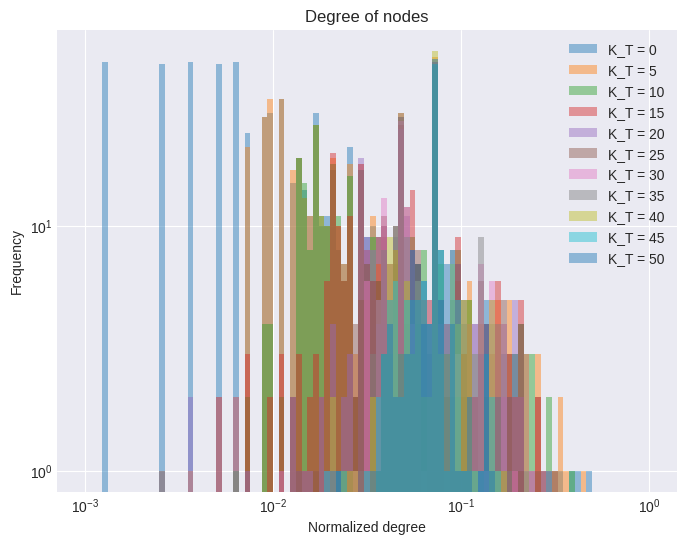

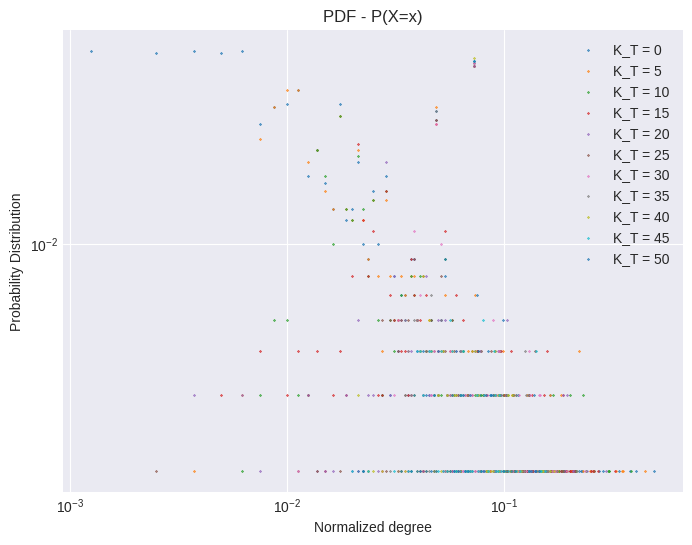

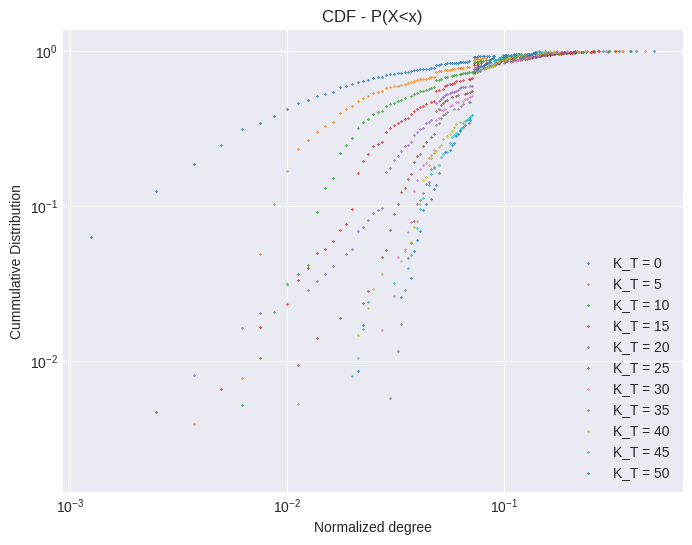

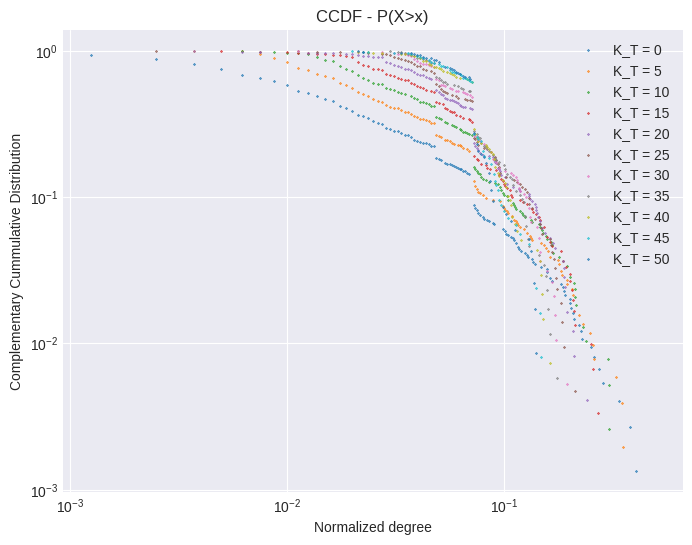

In [33]:
graphs_folder, plots_folder = get_paths(MODE, MANIFESTACION, metric="degree")

calc_plot_degree_distributions_tres(hora, graphs_folder, plots_folder, arr_kt_plot=[0,5,10,15,20,25,30,35,40,45,50])